> ## **Histogram**

### Allowed functions : ```import pandas as pd, import sqlite3 import matplotlib.pyplot as plt```

In [24]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## анализируйте только пользователей, а не администраторов
## создайте два списка значений (для рабочих дней и для выходных) для ввода в гистограмму
## размер рисунка остался прежним, вы можете выбрать размер шрифта, а также цветовую палитру
## используйте уровень прозрачности для гистограммы спереди, равный 0,7
## В конце вашего блокнота Jupyter создайте ячейку с кодом и вставьте вопрос: «Бывают ли часы, когда общее количество коммитов в выходные дни выше, чем в рабочие?» В своём ответе приведите 4 лучших примера.

In [25]:
conn=sqlite3.connect('../data/checking-logs.sqlite')
query='''
select uid, timestamp
from checker
where uid not like "admin%"
'''
df_checker=pd.read_sql(query,conn, parse_dates='timestamp')
df_checker['hour']=df_checker['timestamp'].dt.hour
df_checker['weekday']=df_checker['timestamp'].dt.weekday
df_checker['group_day']=pd.cut(df_checker['weekday'], bins=[-1,4,7],labels=['working_day','weekend'])
df_checker['day']=df_checker['timestamp'].dt.day
df_checker.head()


,uid,timestamp,hour,weekday,group_day,day
0,user_4,2020-04-17 05:19:02.744528,5,4,working_day,17
1,user_4,2020-04-17 05:22:35.249331,5,4,working_day,17
2,user_4,2020-04-17 05:22:45.549397,5,4,working_day,17
3,user_4,2020-04-17 05:34:14.691200,5,4,working_day,17
4,user_4,2020-04-17 05:34:24.422370,5,4,working_day,17


In [14]:
df=df_checker.groupby(['group_day','day','hour'],observed=True).count()
df.reset_index(inplace=True)
df=df[['group_day','hour','uid']]
df

,group_day,hour,uid
0,working_day,6,1
1,working_day,11,7
2,working_day,13,2
3,working_day,18,23
4,working_day,19,16
...,...,...,...
277,weekend,19,47
278,weekend,20,50
279,weekend,21,18
280,weekend,22,5


In [26]:
df=df.groupby(['group_day','hour'],observed=True)['uid'].sum().reset_index()
df

,group_day,hour,uid
0,working_day,0,6
1,working_day,3,2
2,working_day,5,15
3,working_day,6,3
4,working_day,7,31
5,working_day,8,37
6,working_day,9,30
7,working_day,10,132
8,working_day,11,88
9,working_day,12,79


In [45]:
df_working = df[df['group_day'] == 'working_day']
df_weekend = df[df['group_day'] == 'weekend']

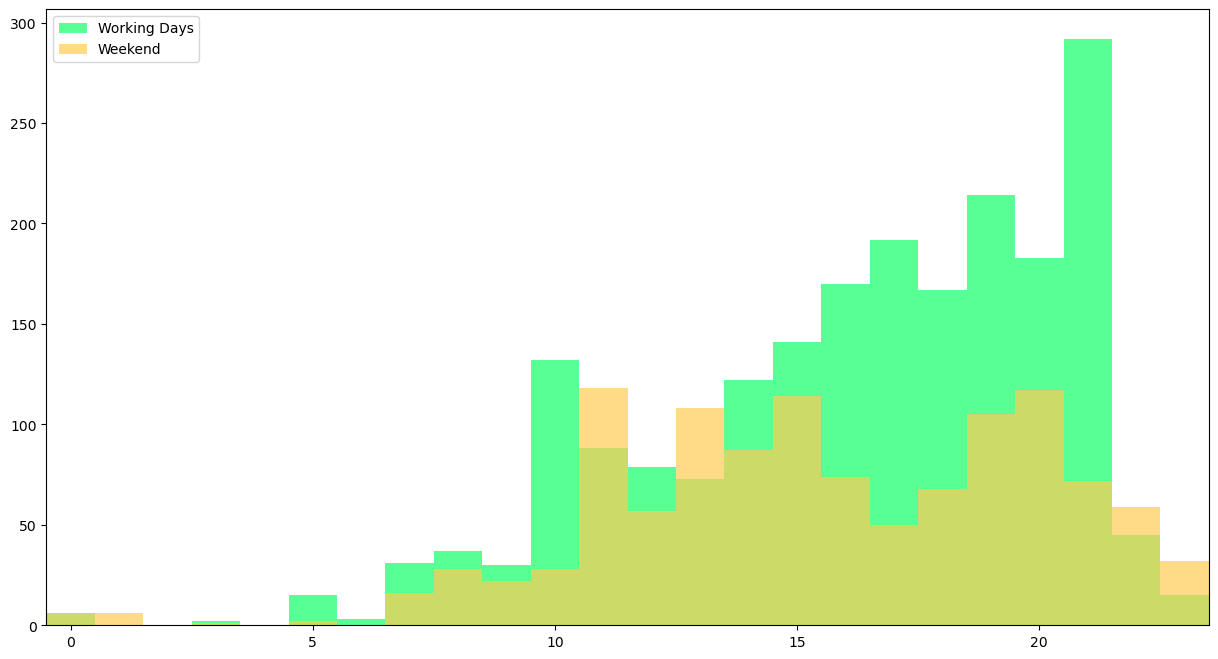

In [71]:
plt.figure(figsize=(15,8))

plt.bar(
    df_working['hour'],
    df_working['uid'],
    label='Working Days',
    color='#58FF94',
    alpha=1.0,
    width=1.0 
)

plt.bar(
    df_weekend['hour'],
    df_weekend['uid'],
    label='Weekend',
    color='#FFCD54',
    alpha=0.7,  
    width=1.0 
)
plt.legend()
plt.xlim(-0.5,23.5) 
plt.show()


## «Бывают ли часы, когда общее количество коммитов в выходные дни выше, чем в рабочие?» В своём ответе приведите 4 лучших примера.

In [98]:
df_pivot=df.pivot_table(index='hour', columns='group_day' ,values='uid',fill_value=0)
top4=df_pivot[df_pivot['working_day']<df_pivot['weekend']].copy()
top4['top']=top4['weekend']-top4['working_day']
top4.sort_values('top',ascending=False).head(4)

group_day,working_day,weekend,top
hour,,,
13,73.0,108.0,35.0
11,88.0,118.0,30.0
23,15.0,32.0,17.0
22,45.0,59.0,14.0


In [99]:
conn.close()